# Bonus Question

In [1]:
!pip3 install psycopg2

In [2]:
import psycopg2

In [3]:
import pandas as pd
import sqlalchemy
from sqlalchemy import create_engine
from config import config 


In [4]:

#Set up connections

params = config()
connection = psycopg2.connect(**params)

cursor  = connection.cursor()
data = cursor.execute('SELECT * FROM employees')
data_csr = cursor.fetchall()

In [46]:
#test connection
data_df = pd.read_sql('select * from employees', connection)
data_df.head()

,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [49]:
#build query for salaries
salary_ranges = pd.read_sql(
("select e.emp_no, (first_name || ' ' || last_name) as full_name, s.salary,"
    "case when s.salary >= 0 and s.salary <= 40000 then '0 to 40000'"
        "when s.salary >=41000 and s.salary <= 80000 then '41000 to 80000'"
        "when s.salary >=81000 and s.salary <=120000 then '81000 to 120000'"
"else '121000 above' end as salary_range from employees e "
"join salaries s " 
"on e.emp_no = s.emp_no "),
connection)
salary_ranges.head()

,emp_no,full_name,salary,salary_range
0,57444,Berry Babb,48973,41000 to 80000
1,13616,Perry Lorho,40000,0 to 40000
2,240129,Roddy Karnin,43548,41000 to 80000
3,427958,Feixiong Poujol,63377,41000 to 80000
4,35916,Wonhee Talmon,40000,0 to 40000


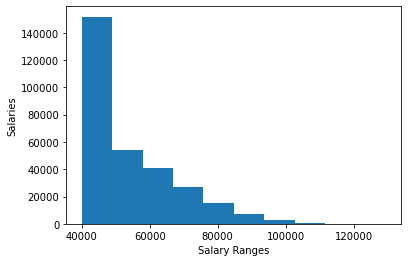

In [48]:
#histogram of salary ranges
import matplotlib.pyplot as plt
#import numpy as np
%matplotlib inline
x = salary_ranges['salary']
plt.hist(x, density=False, bins=10)  # `density=False` would make counts
plt.ylabel('Salaries')

plt.xlabel('Salary Ranges');

In [72]:
#build query for ave salaries by title
ave_sal_title = pd.read_sql(
("select t.title, round(AVG(salary),0) avg_salary "
"from titles t "
"inner join employees e "
"on t.title_id = e.emp_title "
"inner join salaries s "
"on e.emp_no = s.emp_no "
"group by t.title"),
    connection)

ave_sal_title

,title,avg_salary
0,Assistant Engineer,48564.0
1,Engineer,48535.0
2,Manager,51531.0
3,Senior Engineer,48507.0
4,Senior Staff,58550.0
5,Staff,58465.0
6,Technique Leader,48583.0


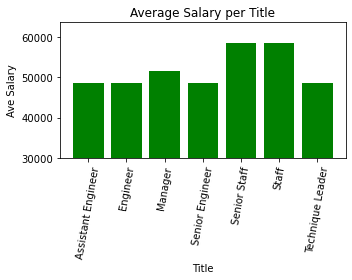

In [67]:
#plot average salaries by title
%matplotlib inline

plt.figure(figsize=(5,4))

x = ave_sal_title['title']
y = ave_sal_title['avg_salary']

plt.bar(x,y, color = 'g')
plt.xticks(rotation=80)

#set x/y limits
plt.ylim(30000, max(ave_sal_title['avg_salary'])+5000)

#set labels
plt.title("Average Salary per Title")
plt.xlabel("Title")
plt.ylabel("Ave Salary")

plt.tight_layout()
plt.show()
